<a href="https://colab.research.google.com/github/pavanshankar32/Algorithmic-Trading/blob/main/Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn


In [ ]:
df = pd.read_csv('/content/aapl.csv')

In [ ]:
df.head(2)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-15-b9c6864122be>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
  df['Daily_Return'] = df['Close'].pct_change()


In [ ]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [ ]:
df.head(2)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,MA_10,MA_50
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0,NaN,NaN,NaN
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0,-0.004864,NaN,NaN


In [ ]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Open,251.0,1.522121e+02,1.303273e+01,1.260100e+02,1.422850e+02,1.507679e+02,1.631071e+02,1.777459e+02
High,251.0,1.543146e+02,1.293048e+01,1.277700e+02,1.443903e+02,1.534259e+02,1.654984e+02,1.788011e+02
Low,251.0,1.501334e+02,1.306097e+01,1.241700e+02,1.401939e+02,1.491126e+02,1.610066e+02,1.759042e+02
Close,251.0,1.522962e+02,1.307132e+01,1.250200e+02,1.422291e+02,1.510700e+02,1.632953e+02,1.781541e+02
Volume,251.0,8.708514e+07,2.394169e+07,3.519590e+07,7.070485e+07,8.229120e+07,9.603815e+07,1.826020e+08
Dividends,251.0,3.625498e-03,2.855176e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e-01
Stock Splits,251.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Daily_Return,250.0,-3.782926e-04,2.259521e-02,-5.867952e-02,-1.511832e-02,-7.363256e-04,1.452465e-02,8.897457e-02
MA_10,242.0,1.524228e+02,1.235525e+01,1.282560e+02,1.430963e+02,1.497512e+02,1.631397e+02,1.747465e+02
MA_50,202.0,1.526565e+02,8.185402e+00,1.391832e+02,1.452613e+02,1.514805e+02,1.592909e+02,1.675378e+02


In [ ]:
df.isna().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Daily_Return,1
MA_10,9


In [ ]:
df.fillna(df['Daily_Return'].mean())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,MA_10,MA_50
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0,-0.000378,-0.000378,-0.000378
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0,-0.004864,-0.000378,-0.000378
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0,-0.011385,-0.000378,-0.000378
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0,-0.000563,-0.000378,-0.000378
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0,-0.002943,-0.000378,-0.000378
...,...,...,...,...,...,...,...,...,...,...,...
246,2023-01-13 00:00:00-05:00,132.029999,134.919998,131.660004,134.759995,57758000,0.0,0.0,0.010119,129.853998,139.512195
247,2023-01-17 00:00:00-05:00,134.830002,137.289993,134.130005,135.940002,63646600,0.0,0.0,0.008756,130.454999,139.335199
248,2023-01-18 00:00:00-05:00,136.820007,138.610001,135.029999,135.210007,69672800,0.0,0.0,-0.005370,131.468999,139.266399
249,2023-01-19 00:00:00-05:00,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0.0,0.000444,132.360000,139.204199


In [ ]:
df.isna().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Daily_Return,1
MA_10,9


<ipython-input-23-d93ebf7aa01b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'])


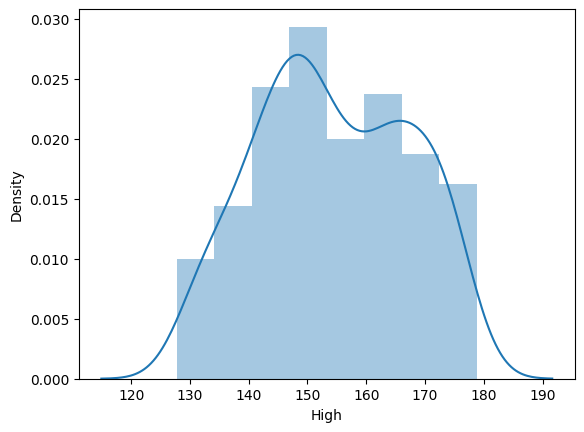

In [ ]:
sns.distplot(df['High'])


plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

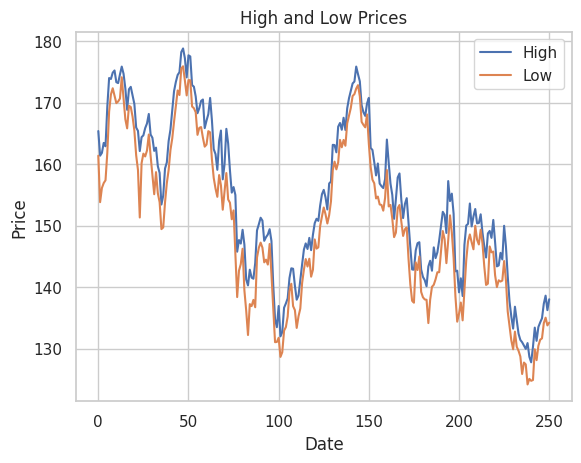

In [ ]:
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')

# Set the plot title and labels
plt.title('High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Display the plot
plt.show()

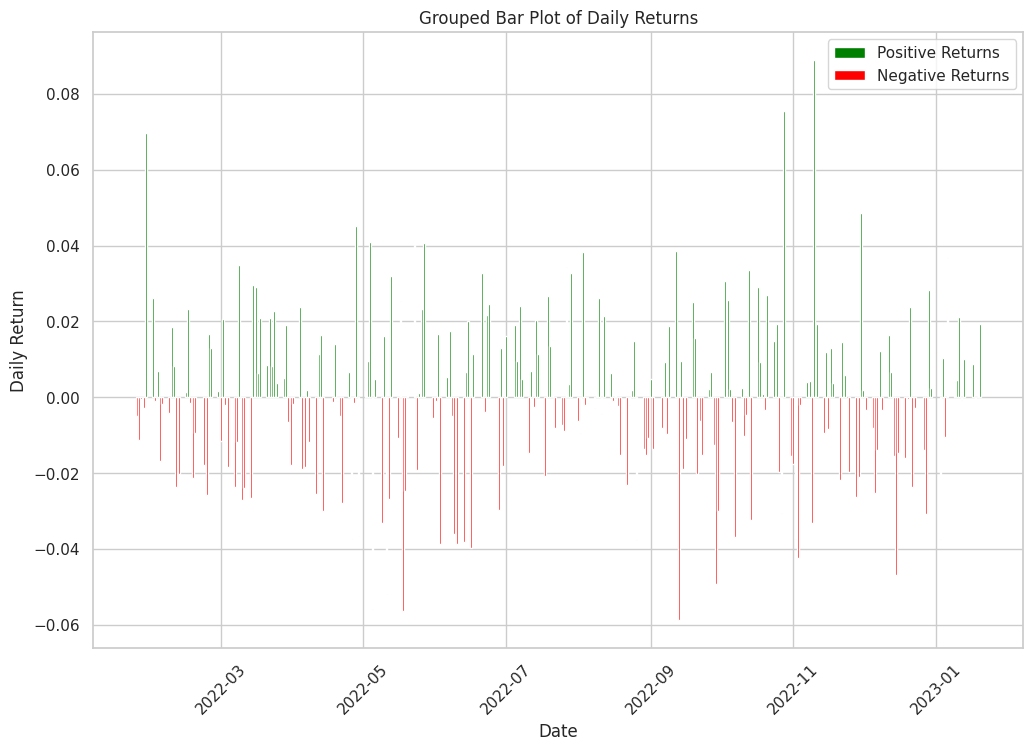

In [ ]:
grouped_df = df.groupby('Date')['Daily_Return'].mean().reset_index()

# Separate positive and negative returns
positive_returns = grouped_df[grouped_df['Daily_Return'] > 0]
negative_returns = grouped_df[grouped_df['Daily_Return'] < 0]

# Create the grouped bar plot
plt.figure(figsize=(12, 8))
plt.bar(positive_returns['Date'], positive_returns['Daily_Return'], color='green', label='Positive Returns')
plt.bar(negative_returns['Date'], negative_returns['Daily_Return'], color='red', label='Negative Returns')

# Set the plot title and labels
plt.title('Grouped Bar Plot of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
df.nunique()


,0
Date,251
Open,251
High,251
Low,250
Close,248
Volume,251
Dividends,3
Stock Splits,1
Daily_Return,250
MA_10,242


In [ ]:
df.head(2).transpose()


,0,1
Date,2022-01-21 00:00:00-05:00,2022-01-24 00:00:00-05:00
Open,163.471251,159.09665
High,165.370233,161.363493
Low,161.363489,153.80734
Close,161.472855,160.687408
Volume,122848900,162294600
Dividends,0.0,0.0
Stock Splits,0.0,0.0
Daily_Return,NaN,-0.004864
MA_10,NaN,NaN


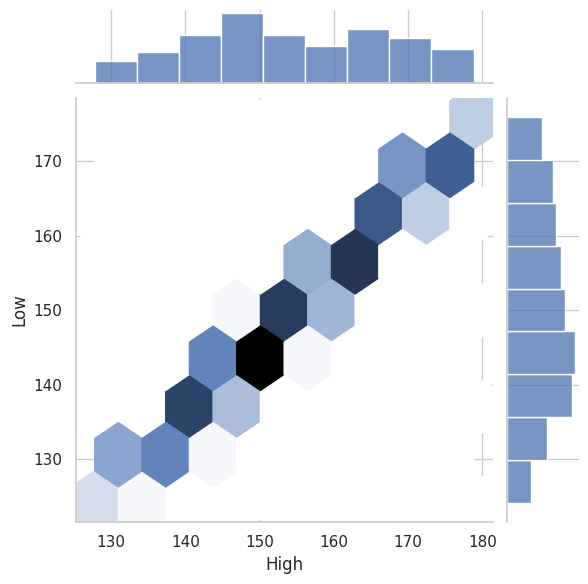

In [ ]:
sns.jointplot(x='High', y='Low', data=df, kind='hex')

# Display the plot
plt.show()

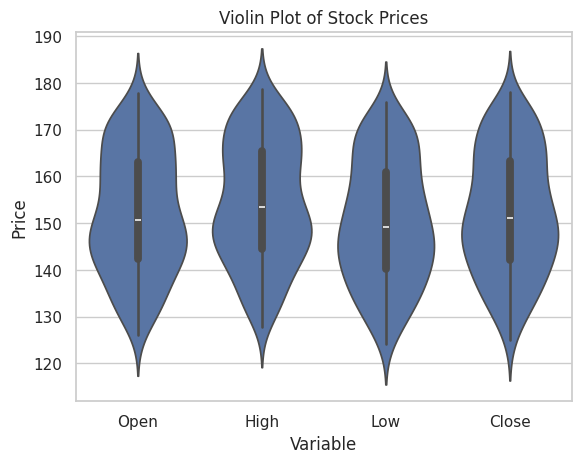

In [ ]:
df_long = df[['Open', 'High', 'Low', 'Close']].melt(var_name='Variable', value_name='Value')

# Create the violin plot
sns.violinplot(x='Variable', y='Value', data=df_long)

# Set the plot title and labels
plt.title('Violin Plot of Stock Prices')
plt.xlabel('Variable')
plt.ylabel('Price')

# Display the plot
plt.show()

In [ ]:
df.to_csv('clean_data.csv', index=False)
